<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/PCA_with_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#!git clone https://github.com/redwankarimsony/PCA-from-Scratch-in-Python.git

from google.colab import drive
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)


#%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from IPython.display import clear_output

import pandas as pd
import numpy as np
classes = {0:'T-shirt/top',
           1:'Trouser',
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle Boot'}

Mounted at /content/drive


In [45]:
selected_labels = [0, 1, 5, 8, 9]

# /content/PCA-from-Scratch-in-Python/fashion_MNIST/fashion-mnist_train.txt

data = pd.read_csv('/content/drive/MyDrive/datasets/fashion-mnist_train.csv')


data = data.loc[data['label'].isin(selected_labels)].reset_index(drop=True)

labels = data.pop('label')
index = 0
data = data.values
images = np.reshape(data, (-1, 28, 28))

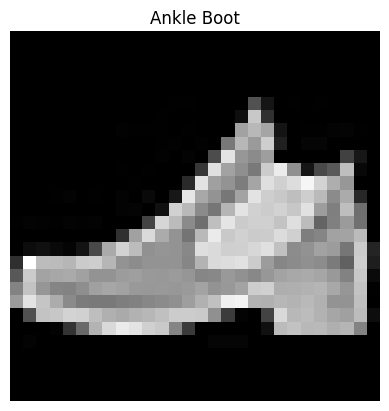

In [46]:
import matplotlib.pyplot as plt
plt.imshow(images[index].squeeze(), cmap = 'gray')
plt.title(classes[labels[index]])
plt.axis('off')
plt.show()
index += 1

# PCA step by step
Here is the short summary of the required steps:
* **Scale the data** — we don’t want some feature to be voted as “more important” due to scale differences. 10m = 10000mm, but the algorithm isn’t aware of meters and millimeters
* **Calculate covariance matrix** — square matrix giving the covariances between each pair of elements of a random vector
* **Eigen Decomposition**


# Scale the Data:
Standardize features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as: $$z = \frac{(x - u)}{s}$$
where $u$ is the mean of the training samples or zero if `with_mean=False`, and $s$ is the standard deviation of the training samples or one if `with_std=False`.

In [47]:
mean_ = data.mean(axis =0)
std_ = data.std(axis=0)

X_scaled = (data-mean_)/std_

# Calculate Covariance Matrix:
Let’s take a step back here and understand the difference between variance and covariance. Variance reports variation of a single random variable — let’s say the weight of a person, and covariance reports how much two random variables vary — like weight and height of a person.
On the diagonal of the covariance matrix we have variances, and other elements are the covariances.

In [48]:
print(f'Shape of X_scaled: {X_scaled.shape}')
features = X_scaled.T
print(f'Shape of features: {features.shape}')
cov_matrix = np.cov(features)
print(f'Shape of cov_matrix: {cov_matrix.shape}')
print('\nSneak Peak of the covariance matrix:\n')
cov_matrix[0:5, 0:5]

Shape of X_scaled: (30000, 784)
Shape of features: (784, 30000)
Shape of cov_matrix: (784, 784)

Sneak Peak of the covariance matrix:



array([[1.00003333, 0.10344873, 0.02532451, 0.02635544, 0.0259777 ],
       [0.10344873, 1.00003333, 0.67948885, 0.16289888, 0.05367159],
       [0.02532451, 0.67948885, 1.00003333, 0.29368204, 0.0353962 ],
       [0.02635544, 0.16289888, 0.29368204, 1.00003333, 0.55370309],
       [0.0259777 , 0.05367159, 0.0353962 , 0.55370309, 1.00003333]])

As you can see, the diagonal elements are identical, and the matrix is symmetrical. Up next, eigendecomposition.

# Eigendecomposition
`Eigendecomposition is a process that decomposes a square matrix into eigenvectors and eigenvalues.` <font color='red'>Eigenvectors are simple unit vectors</font>, and <font color='green'>eigenvalues are coefficients which give the magnitude to the eigenvectors. </font>

We know so far that our `covariance matrix is symmetrical.` As it turns out, `eigenvectors of symmetric matrices are orthogonal.` For PCA this means that we have the first principal component which explains most of the variance. Orthogonal to that is the second principal component, which explains most of the remaining variance. This is repeated for N number of principal components, where N equals to number of original features.

And this turns out to be neat for us — principal components are sorted by percentage of variance explained, as we can decide how many should we keep. For example, if we have 100 features originally, but the first 3 principal components explain 95% of the variance, then it makes sense to keep only these 3 for visualizations and model training.


In [49]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)



print(f'First 10 eigenvalues: {eig_values[:10]}')
print(f'\n\nLast 10 eigenvalues: {eig_values[-10:]}')

First 10 eigenvalues: [153.06599858 134.58513832  53.62624634  45.83523074  35.94793614
  27.1722212   16.16894956  11.26325146   9.89960743   8.76881916]


Last 10 eigenvalues: [0.03207515 0.03185936 0.03047201 0.02958344 0.03128741 0.02955674
 0.03218829 0.03836895 0.03546393 0.03464585]


<ipython-input-50-b239de02c000>:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(eig_values[:200], use_line_collection = True)


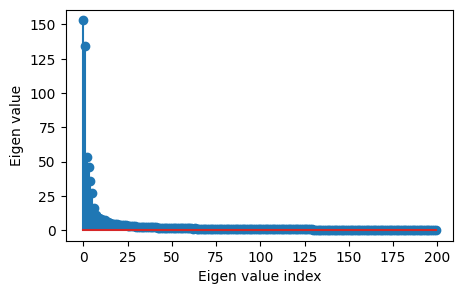

In [50]:
plt.figure(figsize=(5,3))
plt.stem(eig_values[:200], use_line_collection = True)
plt.xlabel('Eigen value index')
plt.ylabel('Eigen value')
plt.show()

In [51]:
for i in range(1000):
    exp_var = np.sum(eig_values[:i+1])*100 / np.sum(eig_values)
    #print(f'Eigenvectors upto {i+1} expresses {exp_var} % variance')

# Visualizations
## Eigenvector Visualization


In [52]:
X_scaled[0].reshape((-1, 784)).shape

(1, 784)

In [53]:
eig_vectors[:, 0].reshape((784, -1)).shape

(784, 1)

In [54]:
result = np.dot(X_scaled.reshape((-1, 784)), eig_vectors[:,:50].reshape((784, -1)))
result.shape

(30000, 50)

In [55]:
projected_1 = X_scaled.dot(eig_vectors.T[0])
projected_2 = X_scaled.dot(eig_vectors.T[1])
res2d = pd.DataFrame(projected_1, columns=['PC1'])
res2d['PC2'] = projected_2
res2d['Y'] = labels
res2d.head()

,PC1,PC2,Y
0,-13.846035,-3.141500,9
1,13.780054,8.119654,0
2,-4.080987,-20.163169,5
3,4.344533,0.808241,8
4,21.412902,19.844596,0


## 2D Visualization

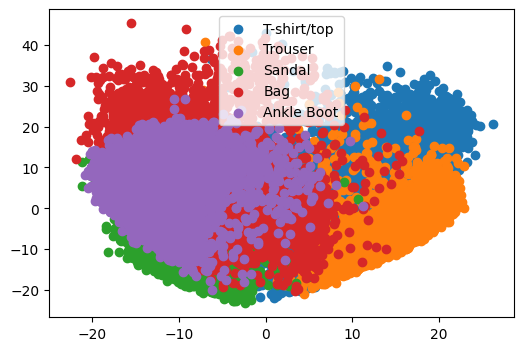

In [56]:
plt.figure(figsize=(6,4))
for label in selected_labels:
    label_name = classes[label]
    coords = res2d[res2d['Y']==label]
    x = coords['PC1'].values
    y = coords['PC2'].values
    plt.scatter(x, y, label=label_name)

plt.legend()
plt.show()

## 3D Visualization

In [57]:
projected_1 = X_scaled.dot(eig_vectors.T[0])
projected_2 = X_scaled.dot(eig_vectors.T[1])
projected_3 = X_scaled.dot(eig_vectors.T[2])
res3d = pd.DataFrame(projected_1, columns=['PC1'])
res3d['PC2'] = projected_2
res3d['PC3'] = projected_3
res3d['Y'] = labels
res3d = res3d.head(500)

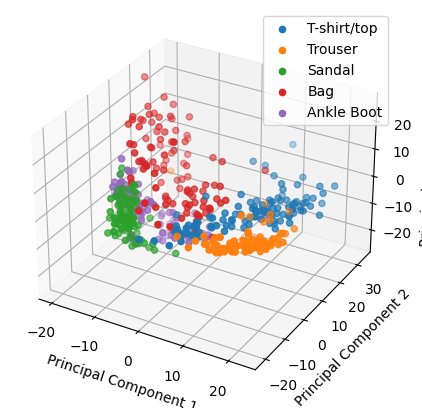

In [58]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

for label in selected_labels:
    label_name = classes[label]
    coords = res3d[res3d['Y']==label]
    x = coords['PC1'].values
    y = coords['PC2'].values
    z = coords['PC3'].values
    ax.scatter3D(x, y, z, label=label_name)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

# Reconstruction from Principal Component
## Reduction/Compression Phase:

In [59]:
reduced_eigen_space = eig_vectors[:, :325]

In [60]:
print(f'Shape of X_scaled: {X_scaled.shape}')
print(f'Shape of reduced_eigen_space: {reduced_eigen_space.shape}')
X_compressed = np.dot(X_scaled, reduced_eigen_space)
print(f'Shape of X_compressed: {X_compressed.shape}')

Shape of X_scaled: (30000, 784)
Shape of reduced_eigen_space: (784, 325)
Shape of X_compressed: (30000, 325)


In [61]:
print(f'Shape of X_compressed: {X_compressed.shape}')
print(f'Shape of reduced_eigen_space: {reduced_eigen_space.shape}')
X_reconstructed = np.dot(X_compressed,reduced_eigen_space.T)
print(f'Shape of X_reconstructed: {X_reconstructed.shape}')

Shape of X_compressed: (30000, 325)
Shape of reduced_eigen_space: (784, 325)
Shape of X_reconstructed: (30000, 784)


In [62]:
data_reconstructed = (X_reconstructed * std_ ) + mean_
reconstructed_images = np.reshape(data_reconstructed, (-1, 28, 28))

In [63]:
rec_index = 0

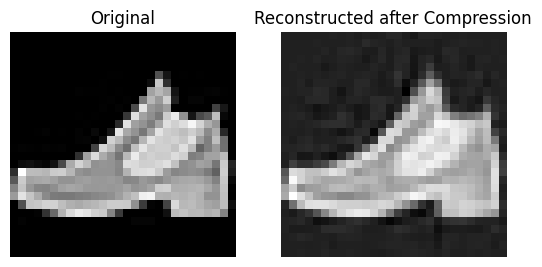

In [64]:
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
plt.imshow(images[rec_index].squeeze(), cmap = 'gray')
ax1.axis(False)
ax2 = f.add_subplot(1,2,2)
ax2.axis(False)
plt.imshow(reconstructed_images[rec_index].squeeze(), cmap = 'gray')
ax1.title.set_text('Original')
ax2.title.set_text('Reconstructed after Compression')
plt.show(block=True)
rec_index +=1
